<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-05-16 20:17:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  61.2MB/s    in 3.3s    

2025-05-16 20:17:33 (61.4 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 180.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 163.8 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 171.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 152.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 155.7 MB/s eta 0:00:00


In [24]:
!pip install seaborn
import seaborn as sns
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


<Axes: >

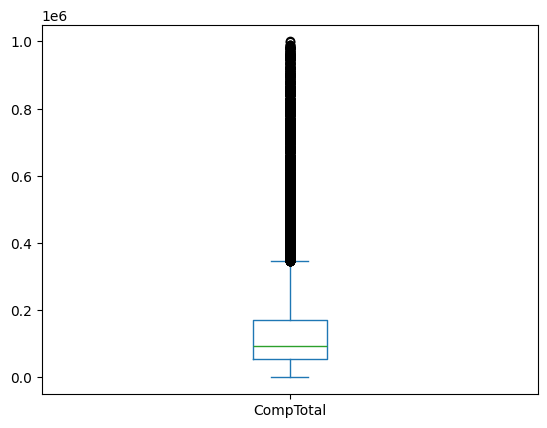

In [8]:
# your code goes here
QUERY='''
SELECT CompTotal from main
WHERE CompTotal is NOT NULL 
AND CompTotal <1000000
'''
df_CompTotal=pd.read_sql_query(QUERY,conn)
df_CompTotal.plot(kind='box')

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


<Axes: >

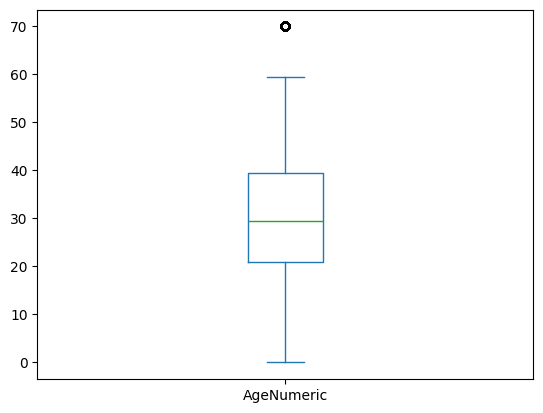

In [9]:
# your code goes here
QUERY = """
SELECT 
    CASE 
        WHEN Age = 'Under 18 years old' THEN 16
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '25-34 years old' THEN 29.5
        WHEN Age = '35-44 years old' THEN 39.5
        WHEN Age = '45-54 years old' THEN 49.5
        WHEN Age = '55-64 years old' THEN 59.5
        WHEN Age = '65 years or older' THEN 70
        ELSE 0
    END AS AgeNumeric
FROM main
WHERE Age is NOT NULL
"""
df_age=pd.read_sql_query(QUERY,conn)
df_age.plot(kind='box')

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


                   Age  CompTotal
0      18-24 years old  2040000.0
1      25-34 years old    28000.0
2      35-44 years old    85000.0
3      35-44 years old    50000.0
4      25-34 years old   110000.0
...                ...        ...
33735  18-24 years old    36000.0
33736  25-34 years old    40000.0
33737  25-34 years old    61000.0
33738  35-44 years old    58000.0
33739  45-54 years old    55000.0

[33740 rows x 2 columns]


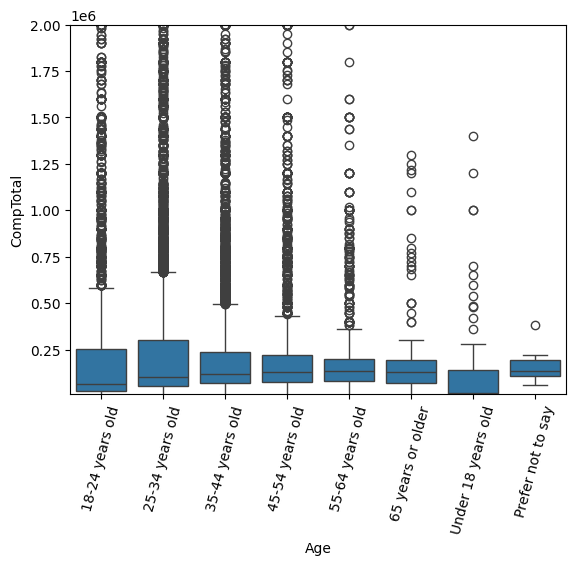

In [33]:
# your code goes here
QUERY='''
SELECT Age,CompTotal from main
WHERE Age IS NOT NULL
AND CompTotal IS NOT NULL
'''
df_CompTotal_Age=pd.read_sql_query(QUERY,conn)
print(df_CompTotal_Age)
sns.boxplot(x='Age',y='CompTotal',data=df_CompTotal_Age)
plt.xticks(rotation=75)
plt.ylim(10000,2000000)
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


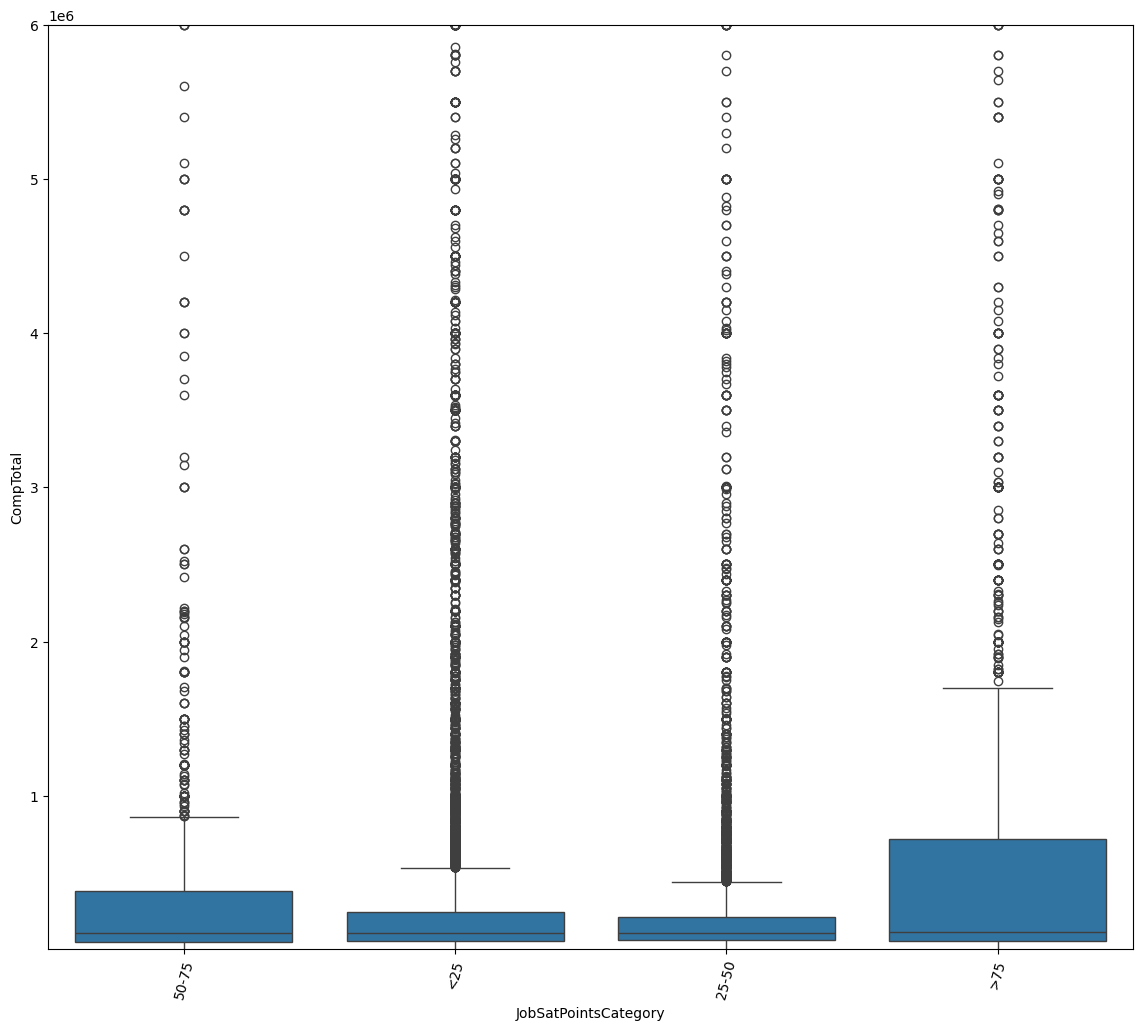

In [79]:
# your code goes here
QUERY='''
SELECT 
    CASE 
        WHEN JobSatPoints_6<25.0 THEN '<25'
        WHEN JobSatPoints_6>=25 AND JobSatPoints_6<=50 THEN '25-50'
        WHEN JobSatPoints_6>=50 AND JobSatPoints_6<=75 THEN '50-75'
        WHEN JobSatPoints_6>=75 THEN '>75'
    END AS JobSatPointsCategory,
    CompTotal from main
WHERE JobSatPoints_6 IS NOT NULL
AND CompTotal IS NOT NULL
'''
df_CompTotal_JobSatisfaction=pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(14,12))
sns.boxplot(x='JobSatPointsCategory',y='CompTotal',data=df_CompTotal_JobSatisfaction)
plt.xticks(rotation=75)
plt.ylim(10000,6000000)
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Developer, back-end'),
  Text(1, 0, 'Developer, full-stack'),
  Text(2, 0, 'Developer, front-end'),
  Text(3, 0, 'Developer, mobile'),
  Text(4, 0, 'Developer, desktop or enterprise applications')])

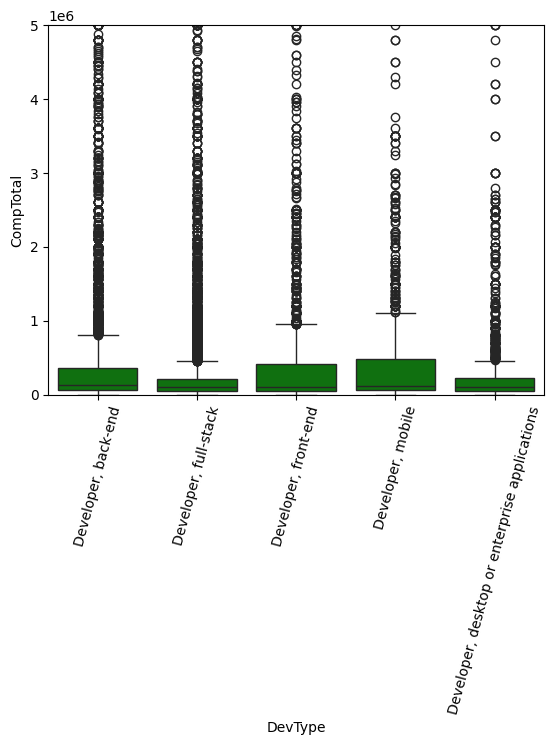

In [101]:
# your code goes here
QUERY='''
SELECT CompTotal,DevType,count(*) as count from main
WHERE DevType is NOT NULL
AND CompTotal is NOT NULL
GROUP BY DevType
ORDER BY count DESC LIMIT 5
'''
Top_5Roles=pd.read_sql_query(QUERY,conn)
Top_5_RoleList=Top_5Roles['DevType'].to_list()
QUERY='''
SELECT CompTotal,DevType from main
WHERE DevType is NOT NULL
AND CompTotal is NOT NULL
'''
df_CompTotal_Roles=pd.read_sql_query(QUERY,conn)
df_CompTotal_Roles=df_CompTotal_Roles[df_CompTotal_Roles['DevType'].isin(Top_5_RoleList)]
sns.boxplot(data=df_CompTotal_Roles,x='DevType',y='CompTotal',color='green')
plt.ylim(0,5000000)
plt.xticks(rotation=75)

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


([0, 1, 2, 3, 4],
 [Text(0, 0, 'United States of America'),
  Text(1, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Ukraine'),
  Text(4, 0, 'India')])

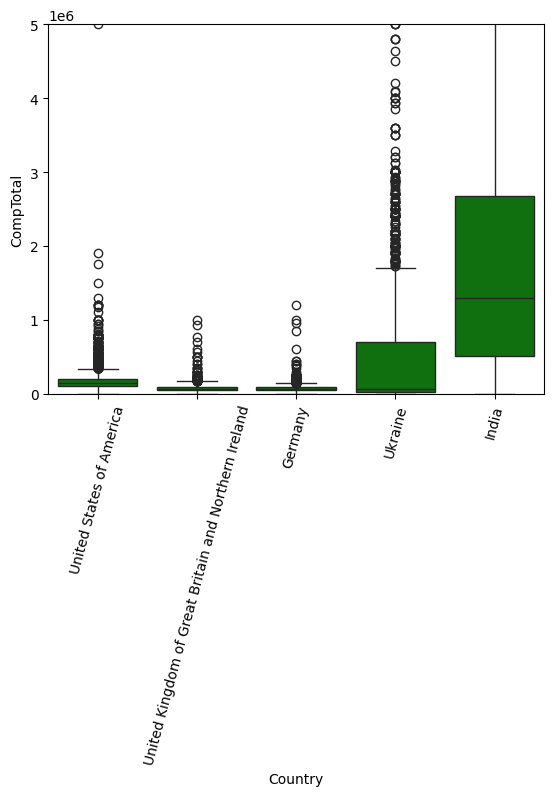

In [99]:
# your code goes here
QUERY='''
SELECT CompTotal,Country,count(*) as count from main
WHERE Country is NOT NULL
AND CompTotal is NOT NULL
GROUP BY Country
ORDER BY count DESC LIMIT 5
'''
Top_5Countries=pd.read_sql_query(QUERY,conn)
Top_5_CountryList=Top_5Countries['Country'].to_list()
QUERY='''
SELECT CompTotal,Country from main
WHERE Country is NOT NULL
AND CompTotal is NOT NULL
'''
df_CompTotal_Country=pd.read_sql_query(QUERY,conn)
df_CompTotal_Country=df_CompTotal_Country[df_CompTotal_Country['Country'].isin(Top_5_CountryList)]
sns.boxplot(data=df_CompTotal_Country,x='Country',y='CompTotal',color='green')
plt.ylim(0,5000000)
plt.xticks(rotation=75)

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


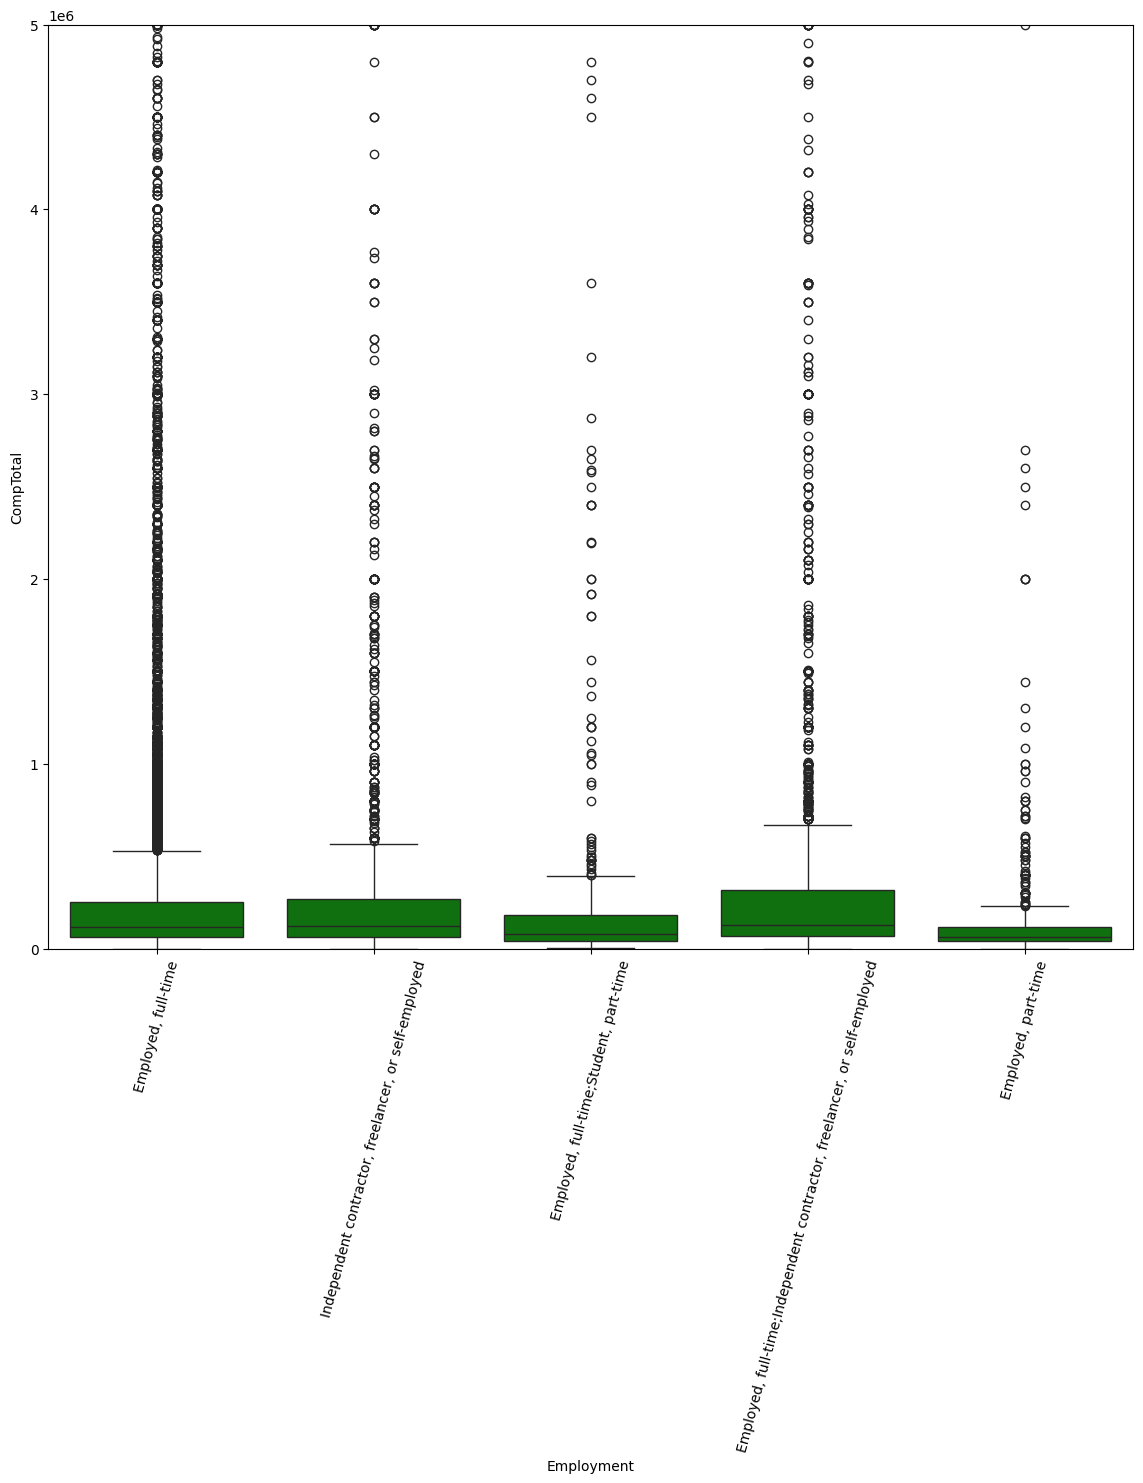

In [97]:
# your code goes here
QUERY='''
SELECT CompTotal, Employment, count(*) as count from main
WHERE Employment IS NOT NULL
AND CompTotal is NOT NULL
GROUP BY Employment
ORDER BY count DESC LIMIT 5
'''
Employment_Top5=pd.read_sql_query(QUERY,conn)
Top5_Employment_List=Employment_Top5['Employment'].to_list()
QUERY='''
SELECT CompTotal, Employment from main
WHERE Employment IS NOT NULL
AND CompTotal is NOT NULL
'''
df_CompTotal_Employment=pd.read_sql_query(QUERY,conn)
df_CompTotal_Employment=df_CompTotal_Employment[df_CompTotal_Employment['Employment'].isin(Top5_Employment_List)]
plt.figure(figsize=(14,12))
sns.boxplot(x='Employment',y='CompTotal',data=df_CompTotal_Employment,color='green')
plt.xticks(rotation=75)
plt.ylim(0,5000000)
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


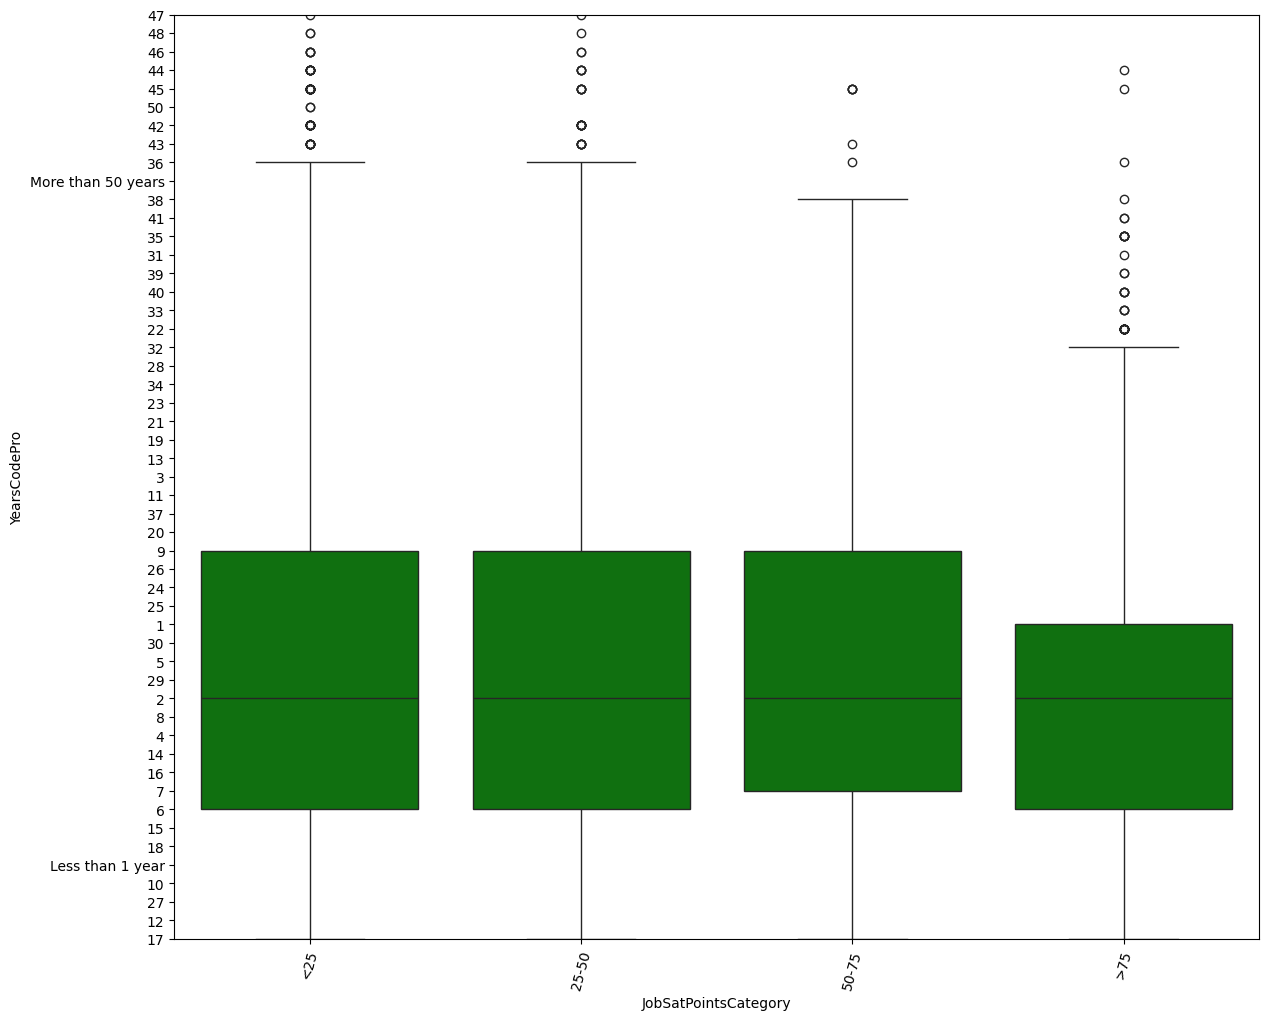

In [89]:
# your code goes here
QUERY='''
SELECT 
    CASE 
        WHEN JobSatPoints_6<25 THEN '<25'
        WHEN JobSatPoints_6>=25 AND JobSatPoints_6<=50 THEN '25-50'
        WHEN JobSatPoints_6>=50 AND JobSatPoints_6<=75 THEN '50-75'
        WHEN JobSatPoints_6>=75 THEN '>75'
    END AS JobSatPointsCategory,
    YearsCodePro 
from main
WHERE JobSatPoints_6 IS NOT NULL
AND YearsCodePro IS NOT NULL
'''
df_YearsCodePro_JobSatisfaction=pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(14,12))
sns.boxplot(x='JobSatPointsCategory',y='YearsCodePro',data=df_YearsCodePro_JobSatisfaction,color='green')
plt.xticks(rotation=75)
plt.ylim(0,50)
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
